@albeli


In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time  
import plotly.express as px


In [7]:
# load the cleaned_crime_data.csv
file_path = "../Resources/cleaned_crime_data.csv"
df = pd.read_csv(file_path)
df.head()

,ds,ofns_desc,boro_nm,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex
0,2010-01-01 00:00:00,RAPE,BROOKLYN,25-44,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
1,2010-01-01 00:00:00,SEX CRIMES,BROOKLYN,18-24,UNKNOWN,F,<18,UNKNOWN,F
2,2010-01-01 00:00:00,OFF. AGNST PUB ORD SENSBLTY &,BRONX,25-44,WHITE HISPANIC,F,18-24,WHITE HISPANIC,F
3,2010-01-01 00:00:00,SEX CRIMES,BRONX,UNKNOWN,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
4,2010-01-01 00:00:00,CRIMINAL MISCHIEF & RELATED OF,BROOKLYN,(null),(null),(null),(null),UNKNOWN,D


In [8]:
yearly_trends_df = df.copy()

In [9]:
# Convert 'ds' column to datetime format
yearly_trends_df['ds'] = pd.to_datetime(yearly_trends_df['ds'])

# Group by year and offense description and calculate the number of cases
yearly_trends = yearly_trends_df.groupby([yearly_trends_df['ds'].dt.year, 'ofns_desc']).size().reset_index(name='counts')
yearly_trends.head()

,ds,ofns_desc,counts
0,2010,(null),2005
1,2010,ADMINISTRATIVE CODE,1132
2,2010,ALCOHOLIC BEVERAGE CONTROL LAW,86
3,2010,ANTICIPATORY OFFENSES,10
4,2010,ARSON,1457


In [10]:
# remove (null) from the ofns_desc column
yearly_trends = yearly_trends[yearly_trends['ofns_desc'] != '(null)']

KeyError: 'Type of Crime'

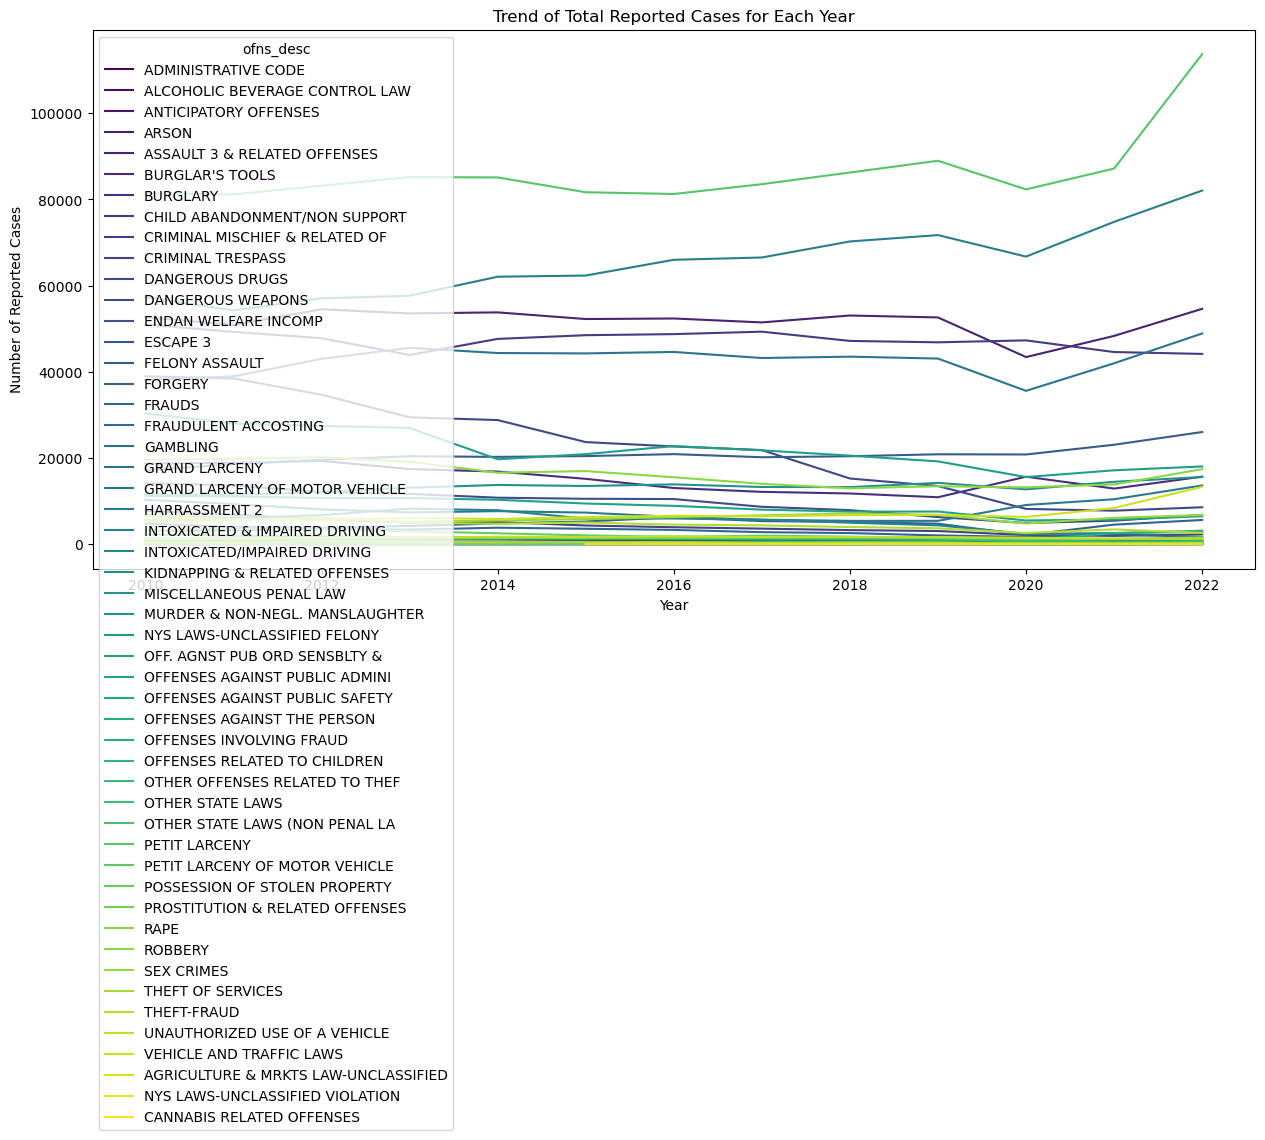

In [11]:
# Plotting the trend of total reported cases for each year
plt.figure(figsize=(15, 7))
sns.lineplot(x='ds', y='counts', data=yearly_trends, hue='ofns_desc', palette='viridis')

# Add title and labels
plt.title('Trend of Total Reported Cases for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Reported Cases')

# Get the top 10 types of crime
top_10_types = yearly_trends['Type of Crime'].head(10).tolist()

# Filter the legend handles and labels for the top 10 types
handles, labels = plt.gca().get_legend_handles_labels()
filtered_handles = [handle for handle, label in zip(handles, labels) if label in top_10_types]
filtered_labels = [label for label in labels if label in top_10_types]

# Move the legend outside the chart
plt.legend(filtered_handles, filtered_labels, title='Type of Crime', bbox_to_anchor=(1.05, 1), loc='upper left')



  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:00<00:00, 489.29it/s]


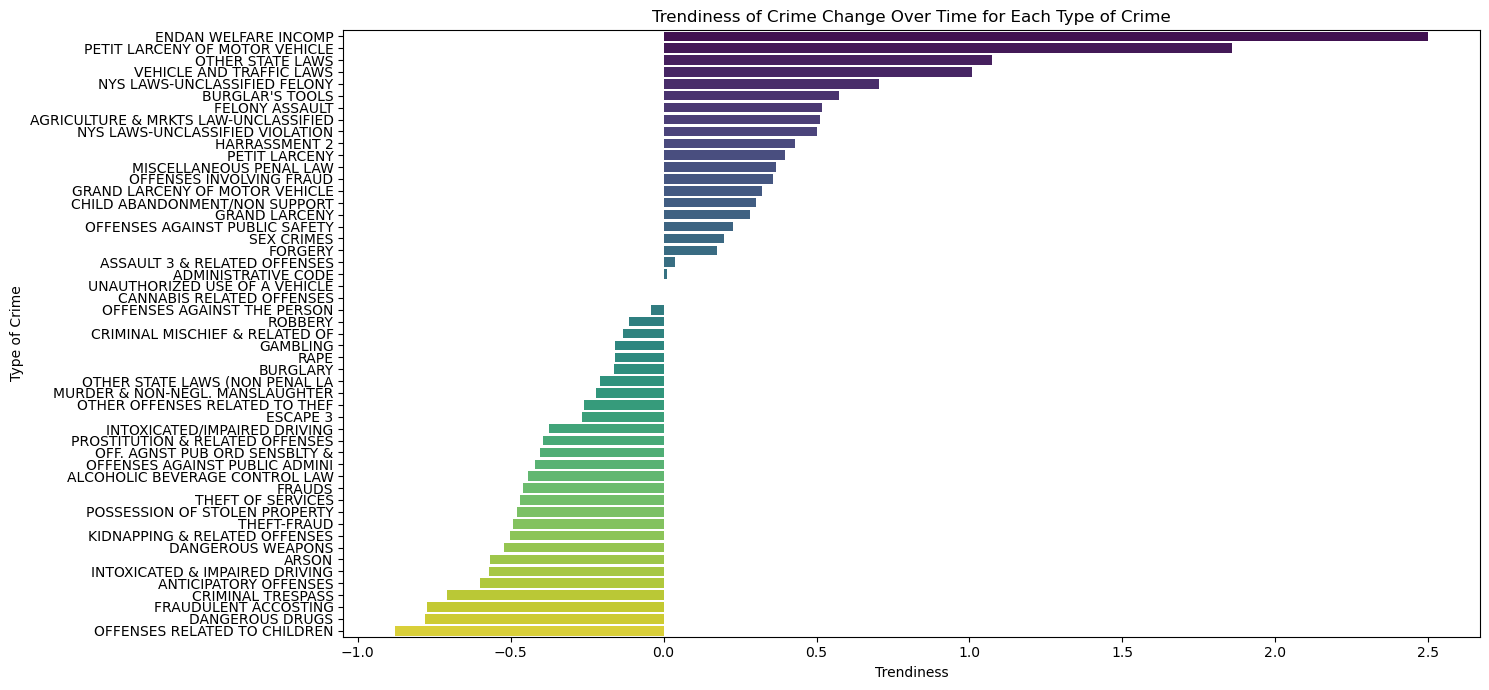

In [12]:
# calculate  trendiness of crime change over time for each type of crime

# Create a new DataFrame to store the trendiness of each type of crime
trendiness_df = pd.DataFrame(columns=['Type of Crime', 'Trendiness'])

# Loop through each type of crime in 'ofns_desc'
for offense in tqdm(yearly_trends['ofns_desc'].unique()):
    # Filter the DataFrame for the current type of crime
    subset = yearly_trends[yearly_trends['ofns_desc'] == offense]
    # Calculate the trendiness
    trendiness = (subset['counts'].iloc[-1] - subset['counts'].iloc[0]) / subset['counts'].iloc[0]
    # Concatenate the results to the new DataFrame
    trendiness_df = pd.concat([trendiness_df, pd.DataFrame({'Type of Crime': [offense], 'Trendiness': [trendiness]})])

# Sort the DataFrame by 'Trendiness' in descending order
trendiness_df.sort_values(by='Trendiness', ascending=False, inplace=True)

# Plot the trendiness of each type of crime
plt.figure(figsize=(15, 7))
sns.barplot(x='Trendiness', y='Type of Crime', data=trendiness_df, palette='viridis')

# Add title and labels
plt.title('Trendiness of Crime Change Over Time for Each Type of Crime')
plt.xlabel('Trendiness')
plt.ylabel('Type of Crime')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

- The crime category "ENDAN WELFARE INCOMP" has the most significant negative trend, suggesting a substantial decline in incidents over the observed period.
- Crimes such as "OFFENSES RELATED TO CHILDREN," "DANGEROUS DRUGS," and "FRAUDULENT ACCOSTING" have shown an increase, with "OFFENSES RELATED TO CHILDREN" having the highest positive trendiness, indicating a significant rise in reported incidents.
-  Several crime categories exhibit little to no change over time, as indicated by bars that are very close to the zero on the trendiness scale. This suggests that the frequency of these crimes has remained relatively stable throughout the observed period.

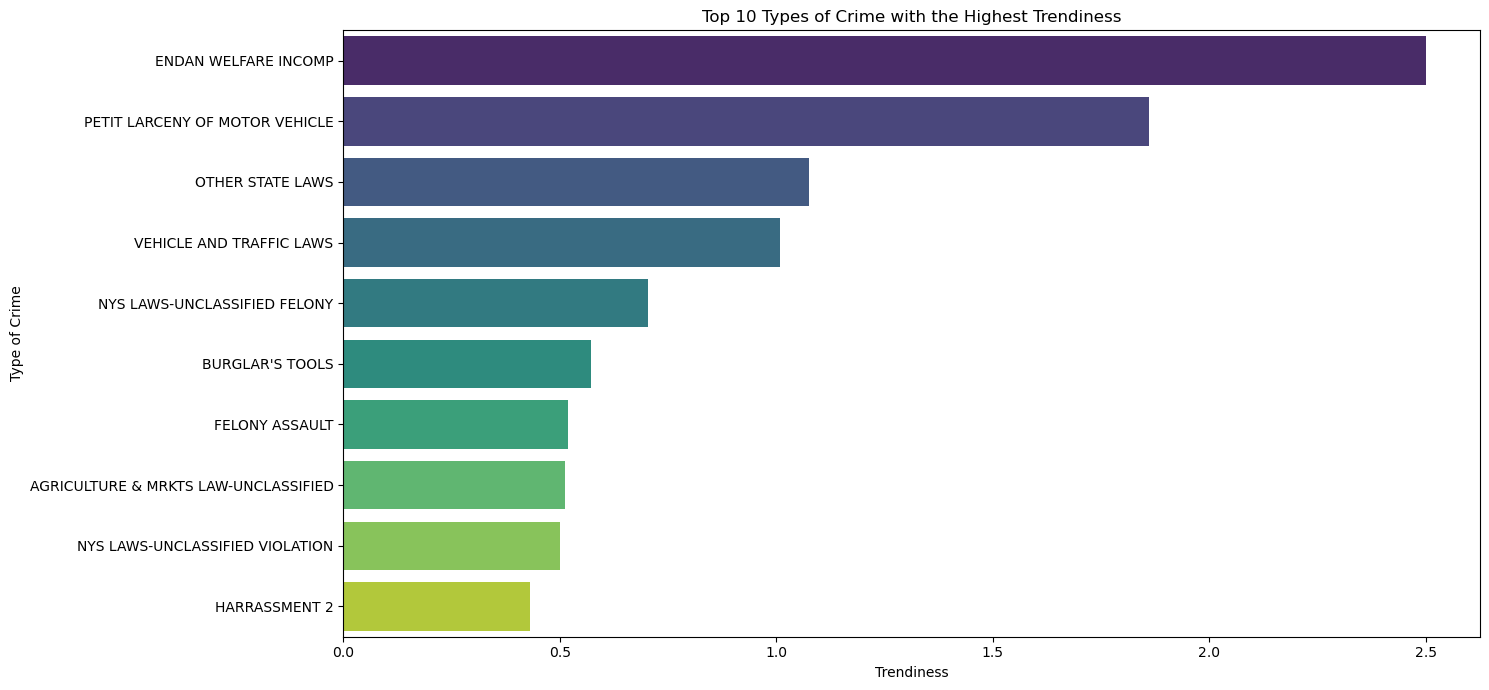

In [13]:
# top 10 type of crime with the highest trendiness
top_10_trendiness = trendiness_df.head(10)

# Plot the trendiness of each type of crime
plt.figure(figsize=(15, 7))
sns.barplot(x='Trendiness', y='Type of Crime', data=top_10_trendiness, palette='viridis')

# Add title and labels
plt.title('Top 10 Types of Crime with the Highest Trendiness')
plt.xlabel('Trendiness')
plt.ylabel('Type of Crime')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

 "ENDAN WELFARE INCOMP" likely refers to a criminal offense that involves endangering the welfare of an incompetent or physically disabled person, categorized as a misdemeanor in New York State laws. This offense is defined in Section 260.24 of the New York Penal Law as "Endangering the welfare of an incompetent or physically disabled person in the second degree" and is considered a Class A misdemeanor.

In [9]:
# Overal trendiness of crime cases over the years
# Calculate the trendiness of crime cases over the years
overall_trendiness = (yearly_trends['counts'].iloc[-1] - yearly_trends['counts'].iloc[0]) / yearly_trends['counts'].iloc[0]

# Print the overall trendiness
print(f"The overall trendiness of crime cases over the years is {overall_trendiness:.2%}")

The overall trendiness of crime cases over the years is 1075.80%


- A 1075.80% increase suggests that the number of crime cases by the end of the period is more than 11 times higher than the number at the start. This is a significant increase, indicating that the volume of reported crime cases has grown substantially over the years included in the dataset.

C:\Users\abeli\AppData\Local\Temp\ipykernel_5592\474526494.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=yearly_trends['ds'], y=yearly_trends['counts'], palette='viridis')


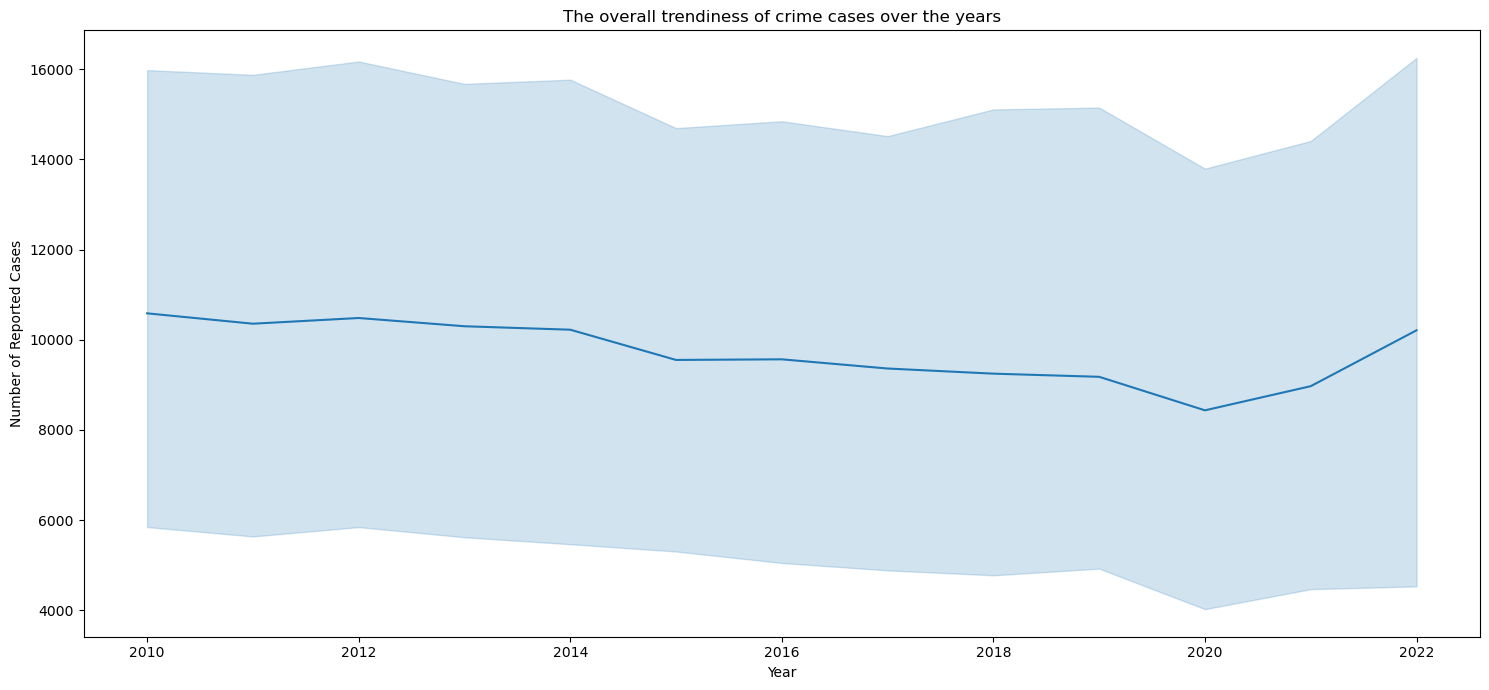

In [10]:
# Plot The overall trendiness of crime cases over the years 
plt.figure(figsize=(15, 7))
sns.lineplot(x=yearly_trends['ds'], y=yearly_trends['counts'], palette='viridis')

# Add title and labels
plt.title('The overall trendiness of crime cases over the years')
plt.xlabel('Year')
plt.ylabel('Number of Reported Cases')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

1. Overall Decline and Recent Increase: The chart shows a general decline in the number of reported crime cases over the years with a noticeable dip around 2016-2017. However, there's an uptick in cases beginning in 2020, with a sharp increase into 2022.

2. Volatility in Crime Reporting: The shaded area suggests that there has been some volatility in the number of reported cases, with the range of reports varying from year to year. The wider the shaded area, the more variability there is in the number of reported cases within that year.

3. Data Interpretation: While the overall trend from 2010 to around 2019 indicates a decrease, the sudden rise in reported cases in 2020 might suggest a change in the pattern of crime, a change in reporting behavior, or external factors influencing crime rates or reporting. The increase in 2022 could warrant further investigation to understand its cause — whether it is due to actual increases in crime or changes in data collection, reporting practices, or other factors.